## Pontos esperados:
1) Apresente as características do conjunto de dados fornecido, destacando sua visão geral acerca do conjunto de dados e tecendo críticas e comentários.;
2) Faça uma análise detalhada das variáveis numéricas e categóricas da base de dados, discutindo sua distribuição e outras características relevantes;
3) Limpeza de dados: Considere a avaliação da existência de valores ausentes e de possíveis outliers, discutindo como estes podem ser tratados ou eliminados;
4) Feature engineering: Quais variáveis você poderia criar para enriquecer a análise?
5) Enriquecimento da base: Inclua qualquer outra informação/análise que achar importante.
6) Que outras bases externas ou internas voce buscaria para enriquecer as análises?
7) Quais os pré-processamentos aplicados e o porquê.
8) Quais modelos escolhidos e o porquê da escolha desses modelos.
9) Quais outras melhorias poderiam ser feitas tanto nos dados quanto em relação à modelagem?
10) Quais métricas foram escolhidas e o porquê.

## [Hotel Booking Prediction](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

1. hotel :(H1 = Resort Hotel or H2 = City Hotel).

2. is_canceled Value: showing if the booking had been cancelled (1) or not (0).

3. lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

4. arrival_date_year: Year of arrival date.

5. arrival_date_month: The months in which guests are coming.

6. arrival_date_week_number: Week number of year for arrival date.

7. arrival_date_day_of_month: Which day of the months guest is arriving.

8. stays_in_weekend_nights: Number of weekend stay at night (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

9. stays_in_week_nights: Number of weekdays stay at night (Monday to Friday) in the hotel.

10. adults: Number of adults.

11. children: Number of children.

12. babies: Number of babies.

13. meal: Type of meal booked.

14. country: Country of origin.

15. market_segment: Through which channel hotels were booked.

16. distribution_channel: Booking distribution channel.

17. is_repeated_guest: The values indicating if the booking name was from a repeated guest (1) or not (0).

18. previous_cancellations: Show if the repeated guest has cancelled the booking before.

19. previous_bookings_not_canceled: Show if the repeated guest has not cancelled the booking before.

20. reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

21. assigned_room_type: Code for the type of room assigned to the booking. Code is presented instead of designation for anonymity reasons.

22. booking_changes: How many times did booking changes happen.

23. deposit_type: Indication on if the customer deposited something to confirm the booking.

24. agent: If the booking happens through agents or not.

25. company: If the booking happens through companies, the company ID that made the booking or responsible for paying the booking.

26. days_in_waiting_list: Number of days the booking was on the waiting list before the confirmation to the customer.

27. customer_type: Booking type like Transient – Transient-Party – Contract – Group.

28. adr: Average Daily Rates that described via way of means of dividing the sum of all accommodations transactions using entire numbers of staying nights.

29. required_car_parking_spaces: How many parking areas are necessary for the customers.

30. total_of_special_requests: Total unique requests from consumers.

31. reservation_status: The last status of reservation, assuming one of three categories: Canceled – booking was cancelled by the customer; Check-Out

32. reservation_status_date: The last status date.

---  
# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
col_cat = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
           'reserved_room_type', 'assigned_room_type', 'deposit_type', 
           'customer_type', 'reservation_status']

col_num = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
           'adults', 'children', 'babies', 'is_repeated_guest', 'is_canceled',
           'previous_cancellations', 'previous_bookings_not_canceled',
           'booking_changes', 'days_in_waiting_list', 'adr', 
           'required_car_parking_spaces', 'total_of_special_requests']

# criar colunas ##############################################################
# cat = 'dt_season', 'dt_arrival_quarter', 'dt_arrival_week_month'
# num = 'stays_in_total', 'guest_total', 'previous_bookings_total', 'is_vacation_period', 'is_weekend'

# não usadas #################################################################
# 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 
# 'arrival_date_day_of_month', 'arrival_date_full', 'reservation_status_date'
# IDs = 'agent', 'company'


In [6]:
df.arrival_date_month = pd.Categorical(df.arrival_date_month, 
                      categories=['January', 'February', 'March', 'April', 'May', 'June',
                                  'July', 'August', 'September', 'October', 'November', 'December'],
                      ordered=True)

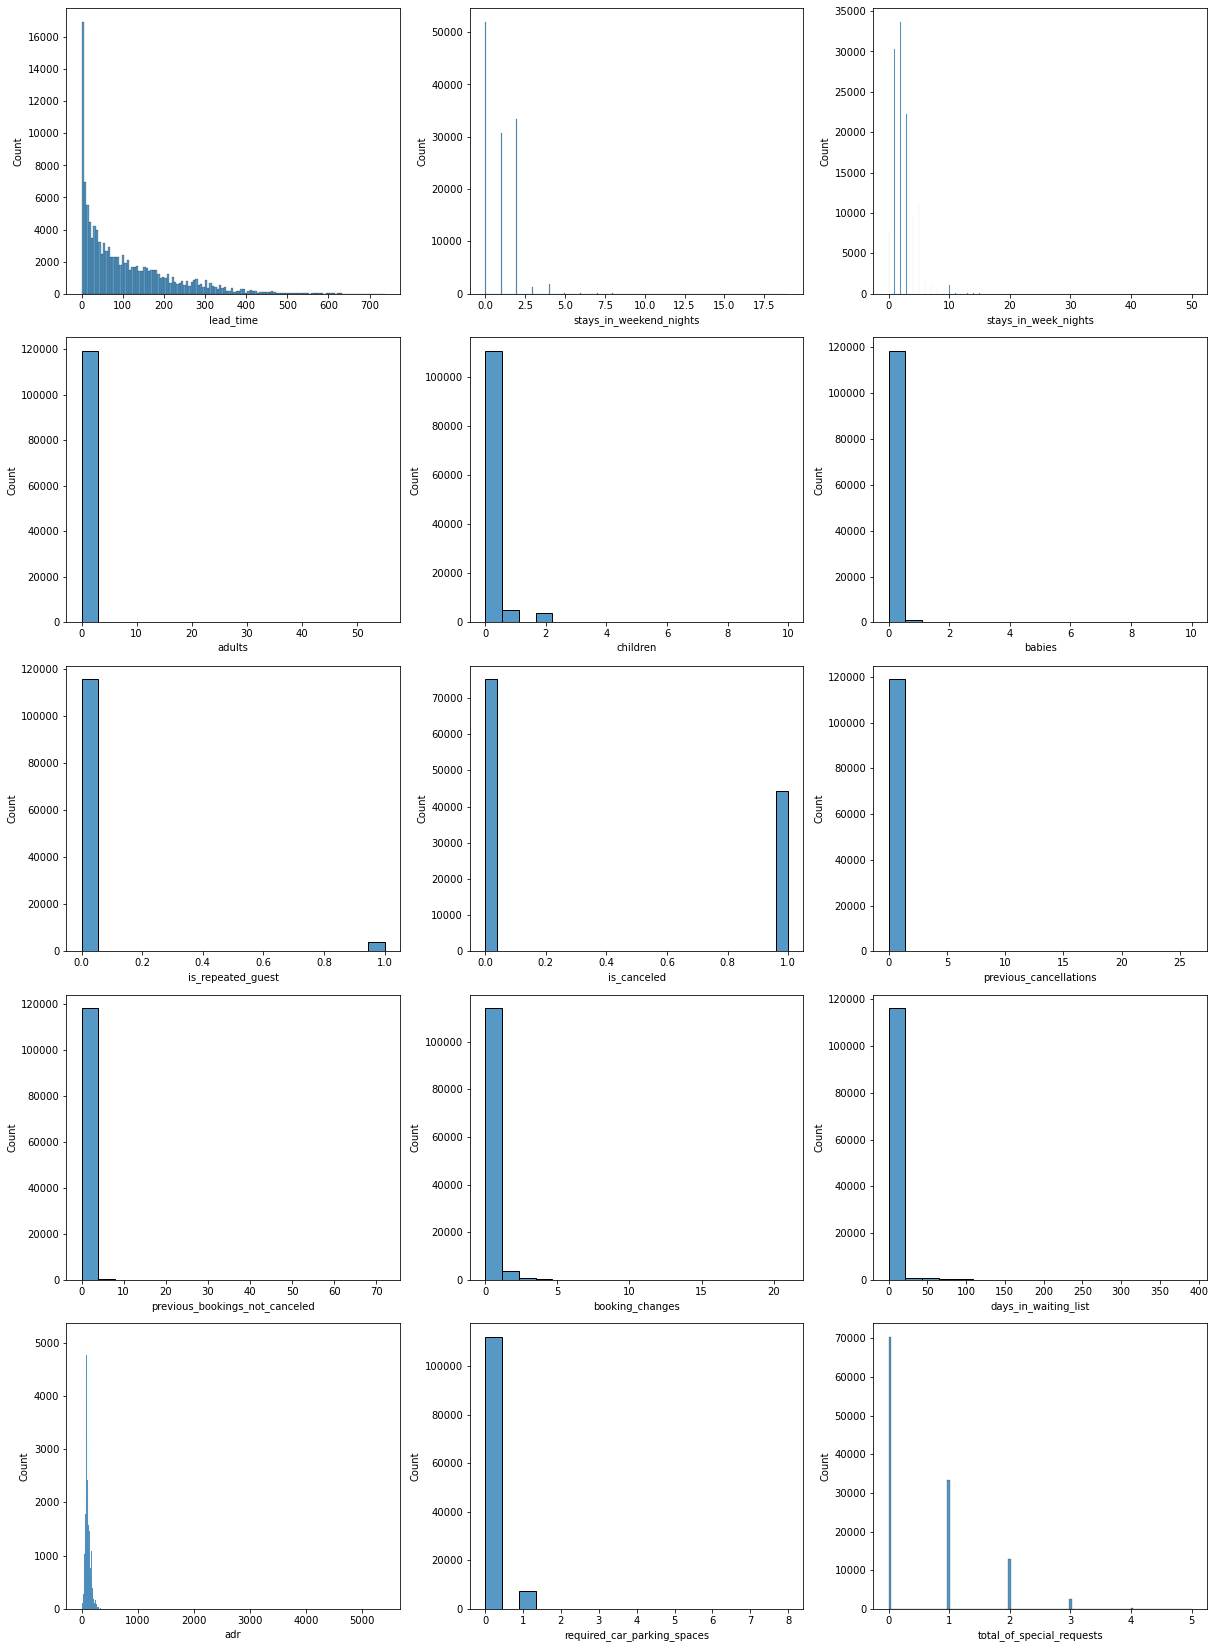

In [7]:
# Analisar variáveis numéricas
c = 3
l = -(- len(col_num) //c)

f, axes = plt.subplots(l, c, figsize=(17,23)) 
y=0
for name in col_num:
    i, j = divmod(y, c)
    sns.histplot(data=df, x=name, ax=axes[i, j])
    y+=1

plt.tight_layout()
plt.show()

In [ ]:
# Análisar variáveis categóricas
c = 3
l = -(- len(col_cat) //c)

f, axes = plt.subplots(l, c, figsize=(17,23)) 
y=0
for name in col_cat:
    i, j = divmod(y, c)
    #sns.catplot(data=df, x=name, kind='count', ax=axes[i, j])
    df[name].value_counts().plot(kind='bar',title = name, ax=axes[i, j])
    y+=1

plt.tight_layout()
plt.show()

---  
# Feature Engineering

- __Split:__ 
    - Train-test split

- __Cleaning:__
    - dropar columnas que não fazem sentido
    - remover duplicados
    - remover linhas baseado em algum critério de filtro
    - remover outliers
    - remover valores errados
    - mudar os datatypes (str, int, float)
    - marcar missings como NAN

**A etapa de limpeza dos dados deve vir antes de imputar valores missing e do one-hot-encoding**.

- __Imputing Missing Values:__ <br>
    - SimpleImputer (média, media, moda)
    - KNNImputer
    - IterativeImputer

__O Imputing deve ser feito ANTES do One-Hot-Encoding__ (tanto que ele não aceita valores nans).

- __Transform features:__ 
    - Features Categóricas: <br>
        - OrdinalEncoder <br>
        - LabelEncoder <br>
        - One-Hot-Encoding <br>
    - Features Numéricas:
        - Binarizer
        - KBinsDiscretizer
        - MinMaxScale
        - StandardScale
        - RobustScale

Os dados nans e tipos de colunas devem ter sido tratados antes desse processo.

- __Feature Engineering:__
    - PolynomialFeatures
    - PowerTransformer
    - Agregação de Features

- __Feature Selection:__
    - Univariate statistical tests
    - Recursive Feature Elimination (RFE)
    - Mutual_info_classif
    - Variance inflation factor (VIF)

In [9]:
# drop columns
# ------------------------------------------------------------------------------------------------------------------
df_clean = df.drop(columns=['reservation_status_date', 'company', 'arrival_date_week_number', 'reservation_status',
                            'arrival_date_year', 'arrival_date_day_of_month', 'arrival_date_week_number'])

# ajustar children 
# ------------------------------------------------------------------------------------------------------------------
df_clean['children'].fillna(0, inplace=True)
df_clean['children'] = pd.to_numeric(df_clean['children'], errors='coerce')

# top5 countries
# ------------------------------------------------------------------------------------------------------------------
top5_country = list(df_clean['country'].value_counts()[:5].index)
df_clean['country'] = df_clean.country.where(df.country.isin(top5_country), 'OTHERS')

# top5 agents
# ------------------------------------------------------------------------------------------------------------------
top5_agent = list(df_clean['agent'].value_counts()[:5].index)
df_clean['agent'] = df_clean.country.where(df.country.isin(top5_agent), 'OTHERS')

df_features = df_clean.copy()

# total guests
# ------------------------------------------------------------------------------------------------------------------
df_features['total_guests'] = df_features['children'] + df_features['babies'] + df_features['adults']
df_features.drop(columns=['children', 'babies', 'adults'], inplace=True)
df_features['total_guests'] = df_features['total_guests'].apply(np.int64)

# stays_in_total
# ------------------------------------------------------------------------------------------------------------------
df_features['stayes_in_total'] = df_features["stays_in_weekend_nights"] + df_features["stays_in_week_nights"]
df_features.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights'], inplace=True)

# cancellation_rate
# ------------------------------------------------------------------------------------------------------------------
df_features['cancellation_rate'] = df_features["previous_cancellations"] / (df_features["previous_cancellations"] + df_features["previous_bookings_not_canceled"])
df_features['cancellation_rate'].replace(np.nan, 0, inplace=True)
df_features.drop(columns=['previous_cancellations', 'previous_bookings_not_canceled'], inplace=True)

# assigned_as_reserved
# ------------------------------------------------------------------------------------------------------------------
df_features['assigned_as_reserved'] = (df_features["assigned_room_type"] == df_features["reserved_room_type"])*1
df_features.drop(columns=['assigned_room_type', 'reserved_room_type'], inplace=True)

In [13]:
cat_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'agent',
            'distribution_channel', 'deposit_type', 'customer_type']

num_cols = ['lead_time', 'is_repeated_guest', 'booking_changes', 'days_in_waiting_list', 'adr', 'assigned_as_reserved',
           'required_car_parking_spaces', 'total_of_special_requests', 'total_guests', 'stayes_in_total', 'cancellation_rate']

target = ['is_canceled']

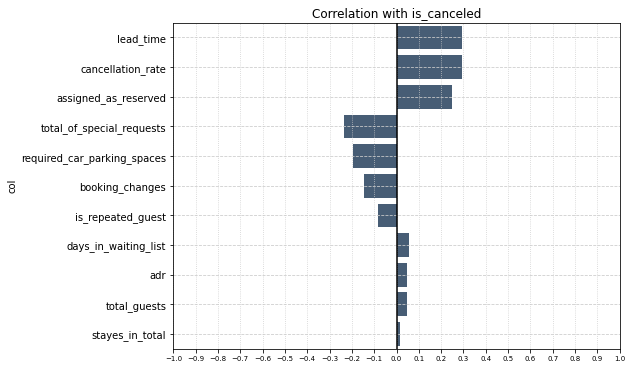

In [14]:
cor = df_features[num_cols].corrwith(df_features.is_canceled).reset_index().rename(columns={'index':'col', 0:'corr'})
cor.sort_values(by='corr', key=abs, ascending=False, inplace=True)

plt.figure(figsize=(8,6))
sns.barplot(data=cor, y='col', x='corr', color='#3F5D7D').set(xlabel='')
plt.xlim([-1,1])
plt.title(f'Correlation with {target[0]}')
plt.xticks(np.arange(-1, 1.01, step=0.1), fontsize=7)
plt.grid(True, axis='y', color='#CCCCCC', linestyle='--')
plt.grid(True, axis='x', color='#CCCCCC', linestyle=':')
plt.axvline(x=0, color='k');

<AxesSubplot:>

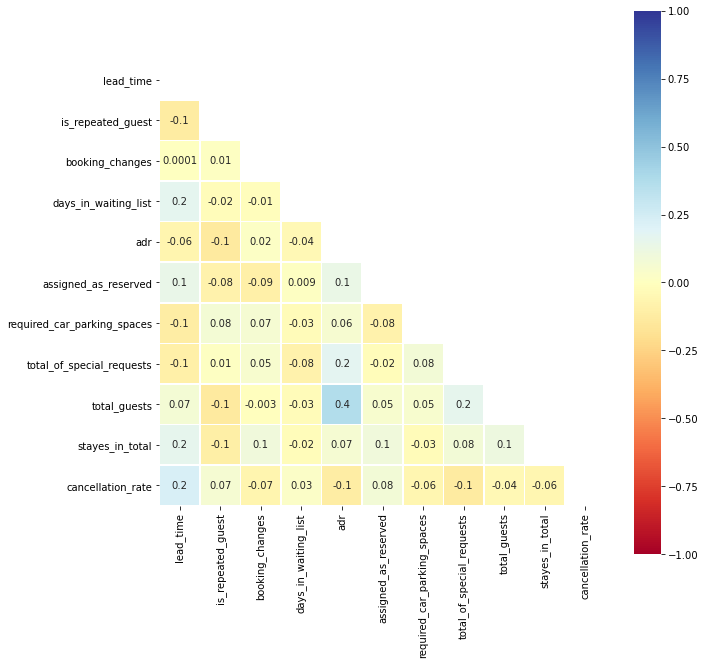

In [15]:
mask = np.triu(np.ones_like(df_features[num_cols].corr(), dtype='bool'))

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_features[num_cols].corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0,
            cmap= 'RdYlBu', square=True, linewidths=.5, mask=mask)

---  
# Models

In [16]:
df = df_features.copy()
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,booking_changes,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,stayes_in_total,cancellation_rate,assigned_as_reserved
0,Resort Hotel,0,342,July,BB,PRT,Direct,Direct,0,3,...,OTHERS,0,Transient,0.0,0,0,2,0,0.0,1
1,Resort Hotel,0,737,July,BB,PRT,Direct,Direct,0,4,...,OTHERS,0,Transient,0.0,0,0,2,0,0.0,1
2,Resort Hotel,0,7,July,BB,GBR,Direct,Direct,0,0,...,OTHERS,0,Transient,75.0,0,0,1,1,0.0,0
3,Resort Hotel,0,13,July,BB,GBR,Corporate,Corporate,0,0,...,OTHERS,0,Transient,75.0,0,0,1,1,0.0,1
4,Resort Hotel,0,14,July,BB,GBR,Online TA,TA/TO,0,0,...,OTHERS,0,Transient,98.0,0,1,2,2,0.0,1


In [28]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score
from sklearn.preprocessing import OneHotEncoder


In [19]:
from imblearn.pipeline import Pipeline as pp
from sklearn.preprocessing import MinMaxScaler

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
from imblearn.over_sampling import SMOTENC

In [24]:
from sklearn.compose import ColumnTransformer

In [43]:
 from sklearn.model_selection import KFold

In [33]:
categorical_features = np.array([i for i,x in enumerate(X_train.columns) if x in cat_cols])

In [34]:
categorical_features

array([ 0,  2,  3,  4,  5,  6,  9, 10, 12])

In [51]:
# Criando pipeline das variáveis categóricas
cat_pipe = pp([
    ('ohe', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'))
])

num_pipe = pp([
    ('scaler', MinMaxScaler())    
])

# Para termos no modelo tanto as variáveis categóricas quanto as numéricas
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_cols),
    ('num', num_pipe, num_cols)
], remainder='passthrough')

# Criando pipeline final
pipe = pp([
    ('over', SMOTENC(random_state=42, categorical_features=categorical_features)),
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=42))
])

# Tunando hiperparâmetros com 3-fold cross-validation e pipelines
penalty = ['l1', 'l2', 'elasticnet', 'none']
dual = [True, False]
C = np.arange(0.5, 1, 0.25)
l1_ratio = np.arange(0.5, 1, 0.10)
solver = ['saga', 'liblinear']



parameters = {'model__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'model__dual' : dual , 
              'model__C': C, 
              'model__l1_ratio' :l1_ratio, 
              'model__solver': solver   }

kfold = KFold(n_splits=3, shuffle=True, random_state=42)
#grid = GridSearchCV(pipe, param_grid=parameters, cv=kfold, scoring='f1', n_jobs=2)
grid = RandomizedSearchCV(pipe, param_distributions=parameters, cv=kfold, scoring='f1', n_jobs=-1, verbose=2)
#grid.fit(x_train[importance_pipe], y_train)

In [52]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
28 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\imblearn\pipeline.py", line 268, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\imblearn\pipeline.py", line 226, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "C:\Use

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('over',
                                              SMOTENC(categorical_features=array([ 0,  2,  3,  4,  5,  6,  9, 10, 12]),
                                                      random_state=42)),
                                             ('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                  

In [53]:
grid.best_params_

{'model__solver': 'liblinear',
 'model__penalty': 'l1',
 'model__l1_ratio': 0.5,
 'model__dual': False,
 'model__C': 0.5}

In [55]:
best_model = grid.best_estimator_

In [59]:
y_pred = best_model.predict(X_test)

In [61]:
clf_report = classification_report(y_test, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     14907
           1       0.75      0.78      0.76      8971

    accuracy                           0.82     23878
   macro avg       0.80      0.81      0.81     23878
weighted avg       0.82      0.82      0.82     23878



In [62]:
y_pred_train = best_model.predict(X_train)

In [64]:
clf_report = classification_report(y_train, y_pred_train)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.83      0.85     60259
           1       0.73      0.76      0.75     35253

    accuracy                           0.81     95512
   macro avg       0.79      0.80      0.80     95512
weighted avg       0.81      0.81      0.81     95512



In [36]:
pipe.fit(X_train,y_train)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('over',
                 SMOTENC(categorical_features=array([ 0,  2,  3,  4,  5,  6,  9, 10, 12]),
                         random_state=42)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'agent',
                                   

In [38]:
y_pred = pipe.predict(X_test)

In [40]:
from sklearn.metrics import classification_report

In [41]:
clf_report = classification_report(y_test, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     14907
           1       0.75      0.77      0.76      8971

    accuracy                           0.82     23878
   macro avg       0.80      0.81      0.80     23878
weighted avg       0.82      0.82      0.82     23878

